## Hands-on - Probability Distributions and Variability

In [91]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
from scipy.stats import binom, norm, ttest_1samp, mannwhitneyu, chi2_contingency

# Load dataset from GitHub URL
file_path = "https://raw.githubusercontent.com/Hamed-Ahmadinia/DASP-2025/main/epa-sea-level.csv"  # URL link to the dataset stored on GitHub

# Read the dataset into a pandas dataframe
df = pd.read_csv(file_path)  # Load the dataset as a pandas DataFrame

# Display the first few rows of the dataframe to confirm the data has been loaded correctly
print("Dataset Preview:")  # Print a label for context
print(df.head(5))  # Display the first 5 rows of the dataset

Dataset Preview:
   Year  CSIRO Adjusted Sea Level  Lower Error Bound  Upper Error Bound  \
0  1880                  0.000000          -0.952756           0.952756   
1  1881                  0.220472          -0.732283           1.173228   
2  1882                 -0.440945          -1.346457           0.464567   
3  1883                 -0.232283          -1.129921           0.665354   
4  1884                  0.590551          -0.283465           1.464567   

   NOAA Adjusted Sea Level  
0                      NaN  
1                      NaN  
2                      NaN  
3                      NaN  
4                      NaN  


## **Exercise 1: Understanding the Dataset**
🔹 **Question:** Display key statistics about the dataset using `.describe()`. `.

In [92]:
df.describe()

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
count,134.000000,134.000000,134.000000,134.000000,21.000000
mean,1946.500000,3.650341,3.204666,4.096016,7.363746
std,38.826537,2.485692,2.663781,2.312581,0.691038
min,1880.000000,-0.440945,-1.346457,0.464567,6.297493
25%,1913.250000,1.632874,1.078740,2.240157,6.848690
50%,1946.500000,3.312992,2.915354,3.710630,7.488353
75%,1979.750000,5.587598,5.329724,5.845472,7.907365
max,2013.000000,9.326772,8.992126,9.661417,8.546648


## **Exercise 2: Identifying Outliers**
🔹 **Question:** Use the **interquartile range (IQR)** method to detect outliers in the **CSIRO Adjusted Sea Level** column. .)re)  


In [93]:
# Your code here:

outlier_found = False #set boolean start value for boolean if outlier is found
sea_level = df['CSIRO Adjusted Sea Level']#sealevel df
Q1= sea_level.quantile(0.25)#first 25 percentile
Q3= sea_level.quantile(0.75)#last 25 percentile
IQR = Q3-Q1 #center 50 percentile

lower_bound= Q1-1.5*IQR # lower outliers
upper_bound = Q3+1.5*IQR # upper outliers
outliners=[] #outlier values


#loop throuht sealevel values 
for x in sea_level: 
    if x < lower_bound or x > upper_bound:# if values are outbound and them to list
        outlier_found = True #Flag for outliers to print correnct message
        outliners.append(x)

if not outlier_found:
    print(f'no outliers in range <- {lower_bound} or {upper_bound} -> ')
else:
    print(outliners)

no outliers in range <- -4.299212594249999 or 11.51968502775 -> 


## **Exercise 3: Exploring Distributions**
🔹 **Question:** Create a **boxplot** of sea level rise grouped by decade (e.g., 1880-1890, 1891-1900, etc.). e?

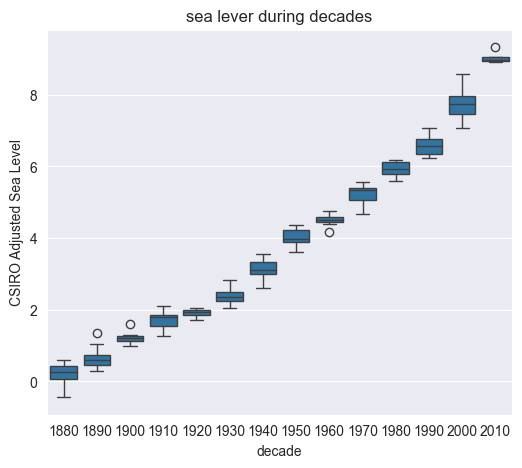

In [94]:
df['decade']= (df['Year']//10)*10 #calculate decade by flooring to to 10ths and multplying
df = df.sort_values(by='decade') #sort values by decade
plt.figure(figsize=(6,5)) 
sns.boxplot(x=df['decade'],y=df['CSIRO Adjusted Sea Level']) # boxplot using decade and sealevel distribution

plt.title("sea lever during decades")
plt.show()

# Viivakaavio NOAA:lle






## **Exercise 4: Hypothesis Testing on Trends**
🔹 **Question:** Perform a **T-test** to check if the mean sea level in the 21st century (2000-2014) is significantly higher than in the 20th century (1900-1999).  


In [95]:
from scipy.stats import ttest_ind

year = df['Year'] #get years
df_20th= df[(1899 < year) & (year < 2000)] # limit year values  20th century (1900-1999)
df_21th= df[(1999 < year) & (year < 2015)]# limit year values  21th century (2000-2014)

df_20th_mean = df_20th['CSIRO Adjusted Sea Level'].mean() #get meanvalues of 20th century
df_21th_mean = df_21th['CSIRO Adjusted Sea Level'].mean() #get meanvalues of 21th century
t_stat,p_val = ttest_ind(df_21th['CSIRO Adjusted Sea Level'], df_20th['CSIRO Adjusted Sea Level']) # Perform an independent t-test to compare the means of 'CSIRO Adjusted Sea Level' 


print(f"Two-sample t-test: sea level 20th vs 21th century\n")
print(f"20th mean level is {df_20th_mean:.2f} and 21th mean level is {df_21th_mean:.2f}\n")
if p_val < 0.05:
    print(f"Very small p-value( <0.05 ) -> {p_val}, so the result is statistically significant.\n")
else:
    print(f"big p-value (> 0.05) -> {p_val}, so the result might not be reliable")
print(f" t-stat: {t_stat}, p-value : {p_val}")












Two-sample t-test: sea level 20th vs 21th century

20th mean level is 3.67 and 21th mean level is 8.14

Very small p-value( <0.05 ) -> 2.8739747491456656e-15, so the result is statistically significant.

 t-stat: 9.159411123588008, p-value : 2.8739747491456656e-15


## **Exercise 5: Probability Distributions**
🔹 **Question:** Fit a **Poisson distribution** to the sea level rise data. ? 


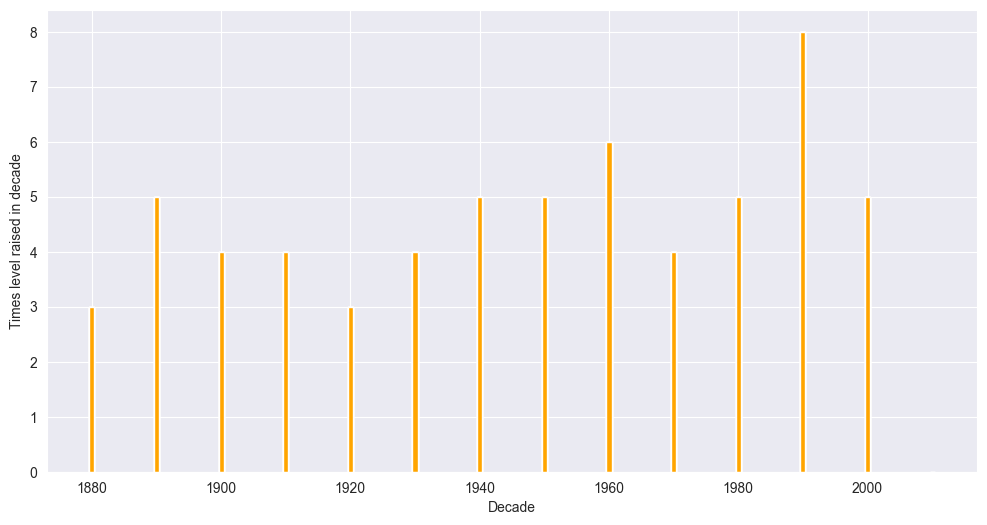

In [96]:
starting_year = df['Year'].min()# get starting year of the  calculation
ending_year = df['Year'].max()# get end year of calculation
df.sort_values(by='Year')#sort values by year
df['times level raised'] = 0 # set default value for level raised

#new dataframe for results
df2 = df[['decade','Year','CSIRO Adjusted Sea Level','times level raised']] #make dataframe from  wanted values

df2.sort_values(by="decade") #sort by decade

#setters for the  loop
current_year = starting_year #set current year  value for the while loop
last_year_sea_level= None 
previous_last_year_sea_level = None

i = 1# integer for detecting when decade is looped over
times_rised = 0 # calculation value of true sea level rise 


##cycle throught the years
while current_year <= ending_year:
    row = df2[df2['Year'] == current_year] #get row which matches current year value
    if not row.empty:
        current_decade = row['decade'].values[0] # get decade value
        current_sea_level = row['CSIRO Adjusted Sea Level'].values[0] # get sealevel value for current year
    
    if last_year_sea_level is None:  # if first round do this
        last_year_sea_level = current_sea_level
    
        
    else:
        #check if current sea level is bigger than two previous then sea level is obviously raised
        if (current_sea_level > last_year_sea_level) & (current_sea_level > previous_last_year_sea_level):
            times_rised+=1
            
        #if decade counted
        if i == 10:
            df2.loc[df2['decade']==current_decade,'times level raised']=times_rised # set value of the times level rised during the decade
            i = 1
            times_rised = 0
            
            
    #set new values for last year and last years previous so we can  compare those two
    previous_last_year_sea_level = last_year_sea_level
    last_year_sea_level = current_sea_level
    current_year +=1         
    i+=1


plt.figure(figsize = (12,6))
plt.bar(df2['decade'],df2['times level raised'] ,color = 'orange',label= 'Sea level Poisson during decades')

plt.ylabel('Times level raised in decade')
plt.xlabel('Decade')

plt.show()

    

## **Exercise 6: Correlation Analysis**
🔹 **Question:** Check if there is a correlation between **CSIRO Adjusted Sea Level** and **NOAA Adjusted Sea Level**.  

     NOAA Adjusted Sea Level  CSIRO Adjusted Sea Level  Year
113                 6.297493                  6.291339  1993
114                 6.310934                  6.500000  1994
115                 6.452569                  6.618110  1995
116                 6.627631                  6.787402  1996
117                 6.733920                  7.066929  1997
118                 6.865806                  6.665354  1998
119                 6.848690                  7.011811  1999
120                 6.920582                  7.062992  2000
121                 7.087460                  7.287402  2001
122                 7.319698                  7.381890  2002
123                 7.488353                  7.759843  2003
124                 7.507933                  7.740157  2004
125                 7.644563                  7.744094  2005
126                 7.697420                  7.917323  2006
127                 7.702147                  7.996063  2007
128                 7.90

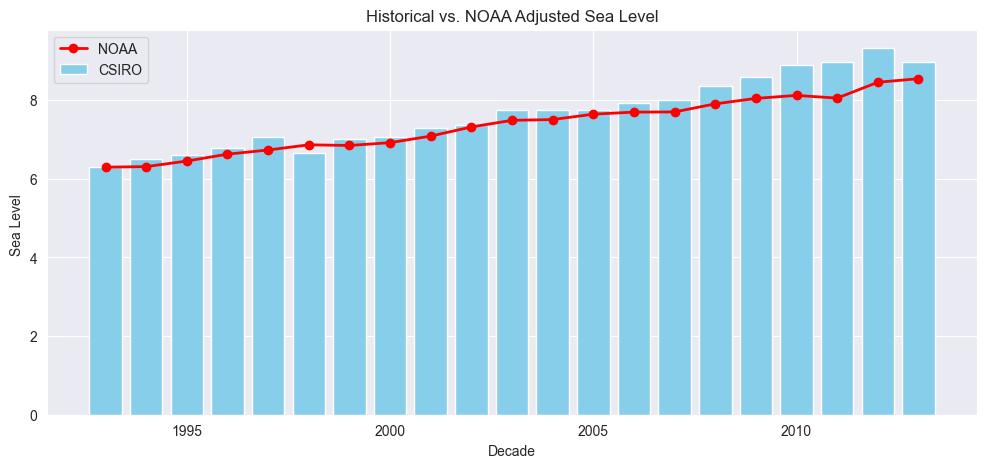

In [97]:
import matplotlib.pyplot as plt

# filter NAN:s
NOAA_df = df[['NOAA Adjusted Sea Level', 'CSIRO Adjusted Sea Level', 'Year']].dropna()
NOAA_df=NOAA_df.sort_values(by='Year')
print(NOAA_df.iloc[0:])

plt.figure(figsize=(12,5))

# Bar diagram for CSIRO
plt.bar(NOAA_df['Year'], NOAA_df['CSIRO Adjusted Sea Level'], color='skyblue', label='CSIRO')

# line for NOAA
plt.plot(NOAA_df['Year'], NOAA_df['NOAA Adjusted Sea Level'], marker='o', linestyle='-', color='red', linewidth=2, label='NOAA')
# Akselit ja otsikot
plt.xlabel('Decade')
plt.ylabel('Sea Level ')
plt.title('Historical vs. NOAA Adjusted Sea Level')

plt.legend()
plt.show()


## **Exercise 7: Summary Reflection**
🔹 **Question:** Summarize your findings from this analysis.  

In [98]:
# Your code here:
#There is correlation between NOAA and CSIRO so the measurements are valid  and sealevel has rised linearly during the years

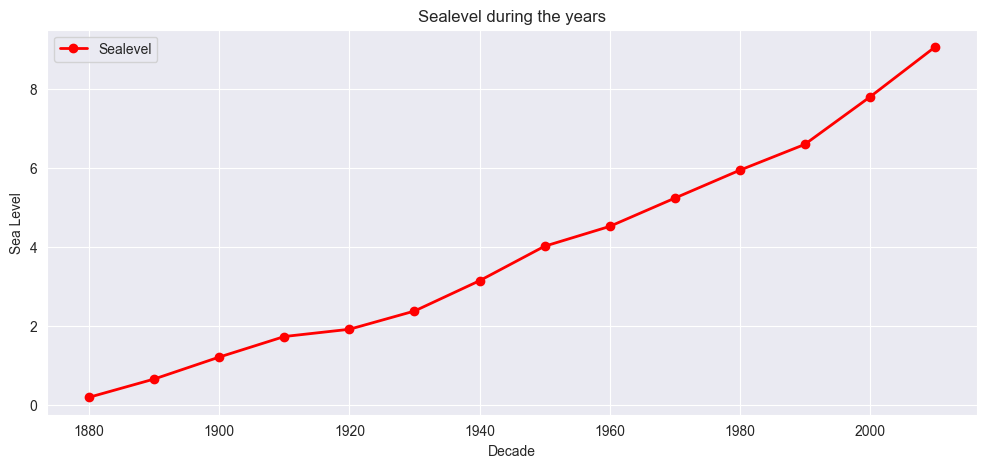

In [99]:
# Sorting by 'Year'
df = df.sort_values('Year')

# Grouping by 'decade' and calculating mean for 'CSIRO Adjusted Sea Level'
df_grouped = df.groupby('decade')['CSIRO Adjusted Sea Level'].mean()

# Plotting
plt.figure(figsize=(12,5))
plt.plot(df_grouped.index, df_grouped.values, marker='o', linestyle='-', color='red', linewidth=2, label='Sealevel')
plt.xlabel('Decade')
plt.ylabel('Sea Level')
plt.title('Sealevel during the years')

# Adding legend and grid
plt.legend()
plt.grid(True)

# Display the plot
plt.show()
